### 函数定义和数据集生成

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return x**2

# 生成训练集和测试集
np.random.seed(42)
x_train = np.random.uniform(-20, 20, 1000)
x_test = np.linspace(-20, 20, 100)
y_train = target_function(x_train)
y_test = target_function(x_test)

### 模型构建

In [52]:
class TwoLayerReLUNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    #定义激活函数
    def relu(self, x):
        return np.maximum(0, x)
    
    #前向传播过程
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1 #第一层
        self.a1 = self.relu(self.z1)#应用激活函数
        self.z2 = np.dot(self.a1, self.W2) + self.b2#第二层
        return self.z2
    
    #反向传播过程
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # 计算输出层的误差
        dz2 = self.z2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # 计算隐藏层的误差
        dz1 = np.dot(dz2, self.W2.T) * (self.z1 > 0)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # 更新参数
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    #模型训练
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean((y_pred - y) ** 2) # 计算损失函数
                print(f"Epoch {epoch}, Loss: {loss}")


### 训练网络与测试效果

Epoch 0, Loss: 32979.52906562663
Epoch 1000, Loss: 434.50841868176633
Epoch 2000, Loss: 527.1323039145809
Epoch 3000, Loss: 370.44384817227433
Epoch 4000, Loss: 291.5267269403115
Epoch 5000, Loss: 242.95163477311624
Epoch 6000, Loss: 206.50530923127636
Epoch 7000, Loss: 178.9480252860363
Epoch 8000, Loss: 155.3358334413024
Epoch 9000, Loss: 133.8339788569067
Epoch 10000, Loss: 121.87494194006605
Epoch 11000, Loss: 110.88262388550949
Epoch 12000, Loss: 103.4505966375931
Epoch 13000, Loss: 90.98951953709192
Epoch 14000, Loss: 83.93710654445155
Epoch 15000, Loss: 76.3825726157137
Epoch 16000, Loss: 68.40516799238469
Epoch 17000, Loss: 61.81436989946816
Epoch 18000, Loss: 59.8954542266246
Epoch 19000, Loss: 56.78153840186057


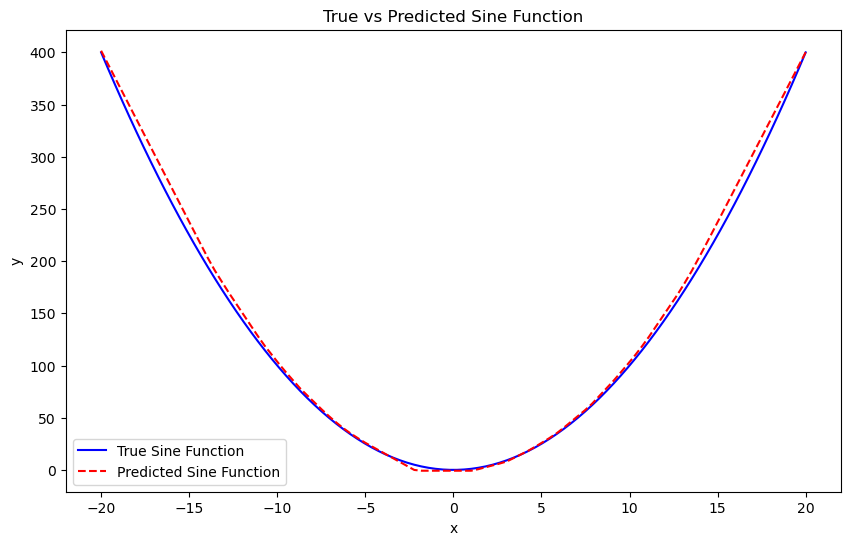

In [53]:
# 初始化网络
input_size = 1
hidden_size = 200
output_size = 1
model = TwoLayerReLUNet(input_size, hidden_size, output_size)

# 训练网络
epochs = 20000
learning_rate = 0.0005
model.train(x_train.reshape(-1, 1), y_train.reshape(-1, 1), epochs, learning_rate)

# 使用测试集进行预测
y_pred = model.forward(x_test.reshape(-1, 1))

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label="True Sine Function", color="blue")
plt.plot(x_test, y_pred, label="Predicted Sine Function", color="red", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("True vs Predicted Sine Function")
plt.show()